In [45]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

### Preprocesado de datos

In [35]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y  # 0=setosa, 1=versicolor, 2=virginica
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [39]:
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [41]:
df.shape

(150, 5)

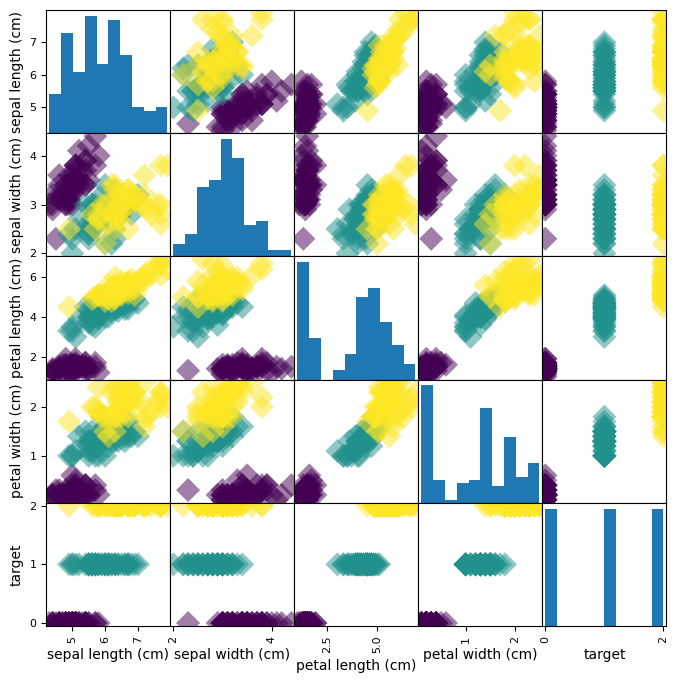

In [49]:
pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')
plt.show();

In [47]:
import warnings
warnings.simplefilter("ignore")
from sklearn import linear_model, discriminant_analysis, neighbors, tree, naive_bayes, svm
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

models = []
models.append(('LogR', linear_model.LogisticRegression()))
models.append(('LDA', discriminant_analysis.LinearDiscriminantAnalysis()))
models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('DTree', tree.DecisionTreeClassifier()))
models.append(('NB', naive_bayes.GaussianNB()))
models.append(('SVM', svm.SVC()))

results = []
names = []
print("Model:\t\t\t Avg. Score\t\t Std Score")
kfold = model_selection.KFold(n_splits=10)
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name + '\t\t', str(cv_results.mean()) + '\t\t', cv_results.std())


Model:			 Avg. Score		 Std Score
LogR		 0.9583333333333333		 0.041666666666666685
LDA		 0.9666666666666666		 0.04082482904638632
KNN		 0.9333333333333333		 0.062360956446232345
DTree		 0.925		 0.058333333333333334
NB		 0.9499999999999998		 0.055277079839256664
SVM		 0.9583333333333333		 0.05590169943749474


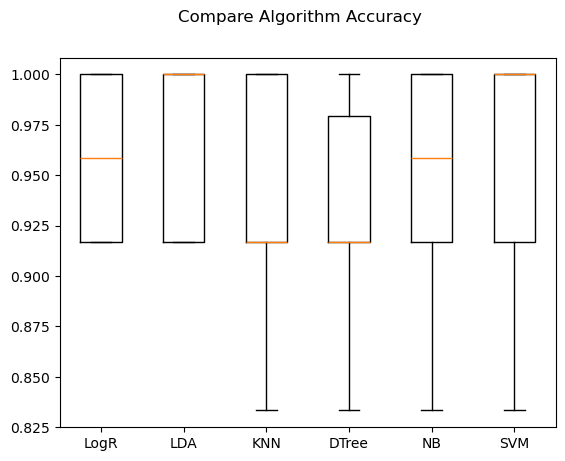

In [51]:
fig = plt.figure()
fig.suptitle('Compare Algorithm Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();